<a href="https://colab.research.google.com/github/mzucali/pyStereoRose/blob/main/RoseDiagram_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import sys
import numpy as np
#import mplstereonet
#import matplotlib.pyplot as plt ##versione py2
import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt #py3 anche py2
#from matplotlib.pyplot import *
import pandas as pd
#matplotlib inline
#%matplotlib notebook
from pathlib import Path


In [3]:
filename = "input_rose_dir_len.xlsx"

In [4]:
#orientazioni = pd.read_excel(filename, 'giaciture')
orientazioni = pd.read_excel(filename)
print(orientazioni.count())
# #a=analisi.count()
# #print("QUANTRE:? "+a)
# #print(analisi.head(analisi.count()))
print()
print("headers\n")
print(list(orientazioni))

dir    11
len    11
dtype: int64

headers

['dir', 'len']


In [6]:
print("\nDIR  values: \n")
print(orientazioni['dir'].tolist())
print("\nLEN values: \n")
print(orientazioni['len'].tolist())


DIR  values: 

[123, 124, 124, 123, 145, 14, 12, 13, 145, 156, 90]

LEN values: 

[12, 11, 13, 155, 155, 12, 1000, 1, 2, 100, 1000]


In [7]:
strikes = orientazioni['dir'].tolist()
dips = orientazioni['len'].tolist()
peso = orientazioni['len'].tolist()
## QUESTO FA IL CALCOLO e prepara two_halves per il PLOT
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes_w, bin_edges = np.histogram(strikes, bin_edges,weights=peso)
number_of_strikes_wdT, bin_edges = np.histogram(strikes, bin_edges,weights=peso, density=True)

In [8]:
#number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
print("NUM OF STRIKES:\n")
print(len(number_of_strikes.tolist()))

number_of_strikes[0] += number_of_strikes[-1]
number_of_strikes_w[0] += number_of_strikes_w[-1]
number_of_strikes_wdT[0] += number_of_strikes_wdT[-1]

half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
half_w = np.sum(np.split(number_of_strikes_w[:-1], 2), 0)
half_wdT = np.sum(np.split(number_of_strikes_wdT[:-1], 2), 0)

two_halves_1 = np.concatenate([half, half])
two_halves_1_w = np.concatenate([half_w, half_w])
two_halves_1_wdT = np.concatenate([half_wdT, half_wdT])

NUM OF STRIKES:

37


<BarContainer object of 36 artists>

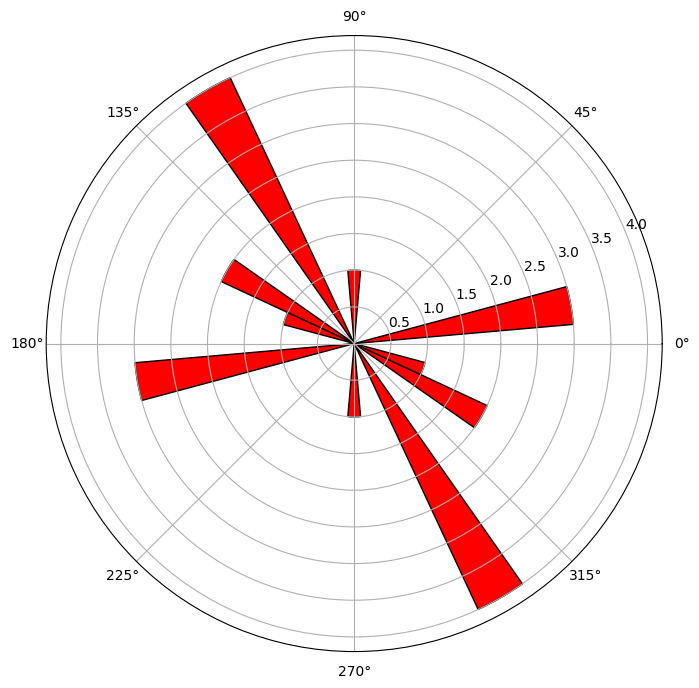

In [11]:
## FIGURE 1

fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(1, 1, 1 ,projection='polar')##NON RIESCO A RIDURRE LO SPAZIO

##DATASET 2
"""
ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves_2,
       width=np.deg2rad(10), bottom=0.0, color='blue', edgecolor='k', label='secondo' )
"""

##DATASET 3
"""
ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves_3,
       width=np.deg2rad(10), bottom=0.0, color='green', edgecolor='k', label='terzo')

"""
##DATASET 1
#"""
ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves_1,
       width=np.deg2rad(10), bottom=0.0, color='red', edgecolor='k', label='un_w')

In [ ]:
##WEIGTHED
#fig = plt.figure(1,figsize=(8,8))
fig2 = plt.figure(2,figsize=(8,8))
##fig2.move_figure(position="bottom")
ax2 = fig2.add_subplot(1, 1, 1 ,projection='polar')##NON RIESCO A RIDURRE LO SPAZIO

ax2.bar(np.deg2rad(np.arange(0, 360, 90)), two_halves_1_w,
       width=np.deg2rad(10), bottom=0.0, color='green', edgecolor='k', label='w')

"""
#"""

In [ ]:
##FIG.3 for weighted with density=True
fig3 = plt.figure(3,figsize=(8,8))
fig2 = plt.figure(2,figsize=(8,8))
ax3 = fig3.add_subplot(1, 1, 1 ,projection='polar')##NON RIESCO A RIDURRE LO SPAZIO

ax3.bar(np.deg2rad(np.arange(0, 360, 90)), two_halves_1_wdT,
       width=np.deg2rad(10), bottom=0.0, color='yellow', edgecolor='k', label='wdT')


#####FUNZIONA LI SOVRAPPONE
#####FUNZIONA LI SOVRAPPONE
##PRIMO PLOT un-weighted
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 90), labels=np.arange(0, 360, 10))
#ax.set_rgrids(np.arange(1, two_halves_1.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram', y=1.10, fontsize=15)
ax.grid(True)
ax.legend()

#SECONDO PLOT weighted
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_thetagrids(np.arange(0, 360, 90), labels=np.arange(0, 360, 10))
ax2.set_title('Weighted Rose Diagram', y=1.10, fontsize=15)
ax2.grid(True)
ax2.legend()

#TERZO PLOT density = True
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
ax3.set_thetagrids(np.arange(0, 360, 90), labels=np.arange(0, 360, 10))
ax3.set_title('Weighted Rose Diagram', y=1.10, fontsize=15)
ax3.grid(True)
ax3.legend()




""" STEREONET DENSITY PLOT
ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()
"""
#""" STEREONET DENSITY PLOT
## FIGURE 2

##UNCOMMENT THESE LINES TO PLOT DENSITY AND POLES
# fig1 = plt.figure(2,figsize=(8,8))
# ax1 = fig1.add_subplot(111, projection='stereonet')
#
# ax1.pole(strikes, dips, c='k', label='Pole of the Planes')
# ax1.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
# ax1.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
# ax1.grid()

## UNCOMMENT ABOVE LINES


#ax1.set_theta_zero_location('N')
#ax1.set_theta_direction(-1)
#ax1.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
#plt.show()
#"""

## MOSTRA TUTTE LE FIG
plt.show()

###############

#fig.savefig('foo.png')
#file_out=filename+'.png'
#fig.savefig(str(file_out))
fig.savefig(filename+"_unw.png")

#fig2.savefig('foo2.png')
#name ="nome"
#print("filename= ")
#print(filename)
#name= Path(filename).name

fig2.savefig(filename+"_w.png")
fig3.savefig(filename+"_wdT.png")
#plt.close(fig)
#plt.close(fig2)

plt.close("all")



DEEPSEEK code

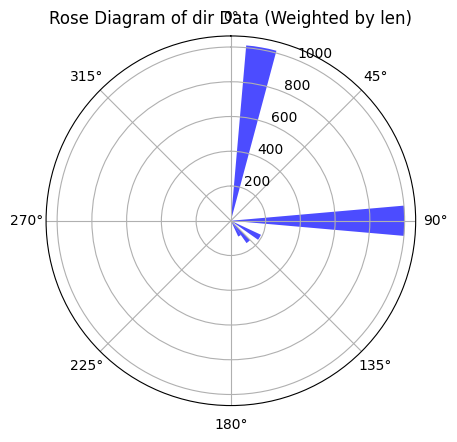

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
file_path = 'input_rose_dir_len.xlsx' # Replace with your file path
sheet_name = 'Sheet1' # Replace with your sheet name
direction_column = 'dir' # Replace with the column name containing direction data
weight_column = 'len' # Replace with the column name containing weight data

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the direction and weight data
direction_data = df[direction_column].dropna().tolist() # Drop NaN values and convert to list
weight_data = df[weight_column].dropna().tolist() # Drop NaN values and convert to list

# Convert degrees to radians
direction_data_radians = np.radians(direction_data)

# Number of bins for the rose diagram
num_bins = 36

# Create a histogram of the direction data, weighted by the weight data
counts, bin_edges = np.histogram(direction_data_radians, bins=num_bins, range=(0, 2*np.pi), weights=weight_data)

# Create the rose diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the bars
ax.bar(bin_edges[:-1], counts, width=(2*np.pi/num_bins), bottom=0.0, color='blue', alpha=0.7)

# Set the direction of the plot to match compass directions (0 degrees at the top)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Add a title
ax.set_title(f"Rose Diagram of {direction_column} Data (Weighted by {weight_column})", va='bottom')

# Show the plot
plt.show()

Do you want to use the weight column? (yes/no): no


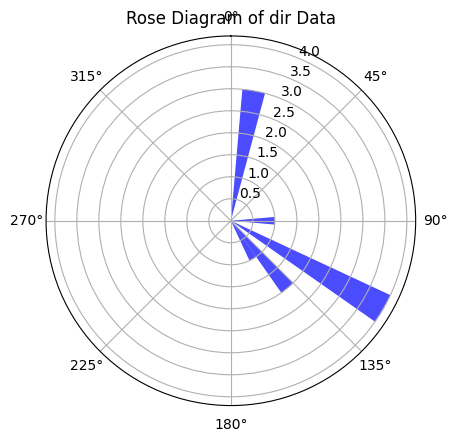

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
file_path = 'input_rose_dir_len.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'  # Replace with your sheet name
direction_column = 'dir'  # Replace with the column name containing direction data
weight_column = 'len'  # Replace with the column name containing weight data

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the direction data
direction_data = df[direction_column].dropna().tolist()  # Drop NaN values and convert to list

# Ask the user if they want to use the weight column
use_weight = input("Do you want to use the weight column? (yes/no): ").strip().lower()
#use_weight = "yes"
#use_weight = "no"

if use_weight == 'yes':
    # Extract the weight data
    weight_data = df[weight_column].dropna().tolist()  # Drop NaN values and convert to list
    weights = weight_data
    title_suffix = f" (Weighted by {weight_column})"
else:
    weights = None
    title_suffix = ""

# Convert degrees to radians
direction_data_radians = np.radians(direction_data)

# Number of bins for the rose diagram
num_bins = 36

# Create a histogram of the direction data, optionally weighted
counts, bin_edges = np.histogram(direction_data_radians, bins=num_bins, range=(0, 2*np.pi), weights=weights)

# Create the rose diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the bars
ax.bar(bin_edges[:-1], counts, width=(2*np.pi/num_bins), bottom=0.0, color='blue', alpha=0.7)

# Set the direction of the plot to match compass directions (0 degrees at the top)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Add a title
ax.set_title(f"Rose Diagram of {direction_column} Data{title_suffix}", va='bottom')

# Show the plot
plt.show()

ROSE DIAGRAM v2 29/01/2025

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# Load the Excel file
file_path = 'input_rose_dir_len.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'  # Replace with your sheet name
direction_column = 'dir'  # Replace with the column name containing direction data
weight_column = 'len'  # Replace with the column name containing weight data

Do you want to use the weight column? (yes/no): no


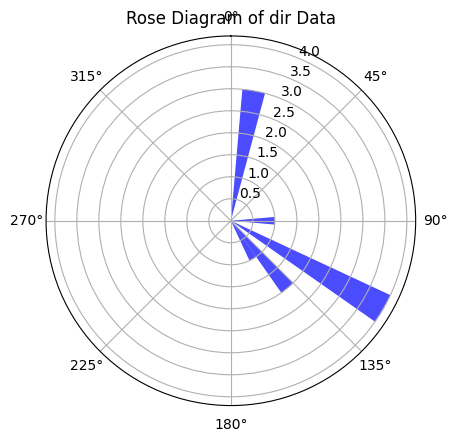

In [8]:
##RUNNING

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the direction data
direction_data = df[direction_column].dropna().tolist()  # Drop NaN values and convert to list

# Ask the user if they want to use the weight column
use_weight = input("Do you want to use the weight column? (yes/no): ").strip().lower()

if use_weight == 'yes':
    # Extract the weight data
    weight_data = df[weight_column].dropna().tolist()  # Drop NaN values and convert to list
    weights = weight_data
    title_suffix = f" (Weighted by {weight_column})"
else:
    weights = None
    title_suffix = ""

# Convert degrees to radians
direction_data_radians = np.radians(direction_data)

# Number of bins for the rose diagram
num_bins = 36  # You can adjust this for finer or coarser bins

# Create a histogram of the direction data, optionally weighted
counts, bin_edges = np.histogram(direction_data_radians, bins=num_bins, range=(0, 2*np.pi), weights=weights)

# Create the rose diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the bars
ax.bar(bin_edges[:-1], counts, width=(2*np.pi/num_bins), bottom=0.0, color='blue', alpha=0.7)

# Set the direction of the plot to match compass directions (0 degrees at the top)
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)  # Clockwise direction

# Set the x-axis (theta) limits to 0 to 360 degrees
ax.set_thetamin(0)
ax.set_thetamax(360)

# Add a title
ax.set_title(f"Rose Diagram of {direction_column} Data{title_suffix}", va='bottom')

# Show the plot
plt.show()